In [1]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 117.80 MiB | 8.50 MiB/s, done.
Updating files: 100% (4/4), done.


In [2]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle
import pandas as pd
import random
import cv2
import torch

In [4]:
np.random.seed(0)

In [5]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)


X_train , y_train = train_data['features'], train_data['labels']
X_val , y_val = val_data['features'], val_data['labels']
X_test , y_test = test_data['features'], test_data['labels']

In [6]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [7]:
print(X_train.shape[1:] == (32, 32, 3))
print(X_val.shape[1:] == (32, 32, 3))
print(X_test.shape[1:] == (32, 32, 3))

True
True
True


    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

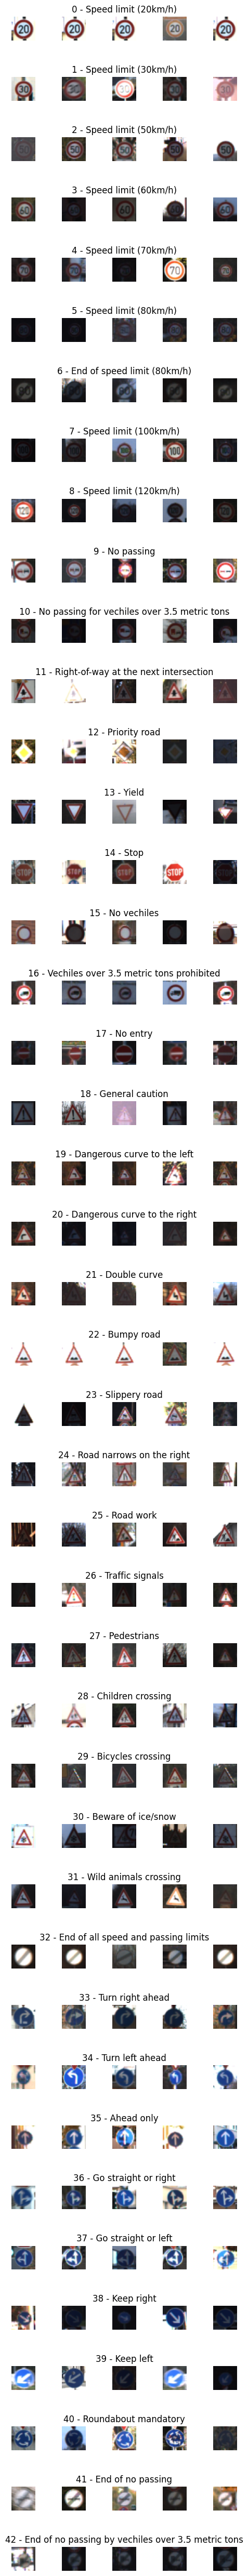

In [8]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

num_of_samples = []

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, (len(x_selected) - 1)), :, :], cmap = plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
          axs[j][i].set_title(str(j) + " - " + row["SignName"])
          num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


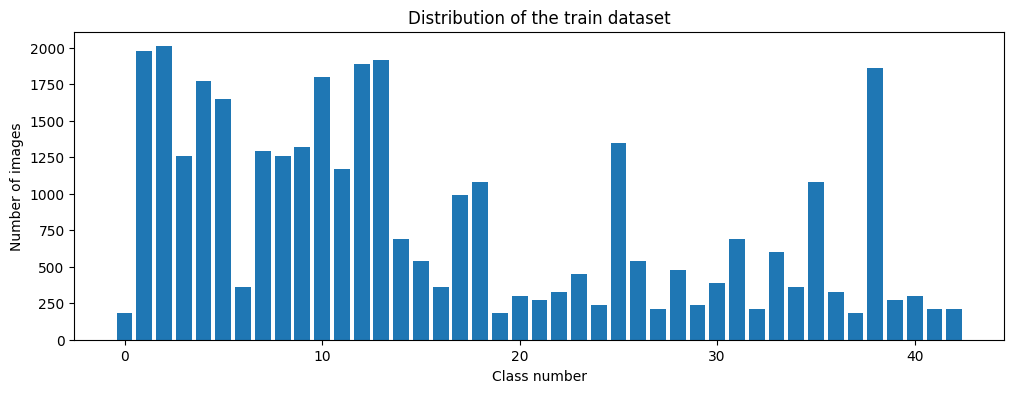

In [9]:
print(num_of_samples)
plt.figure(figsize = (12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
1


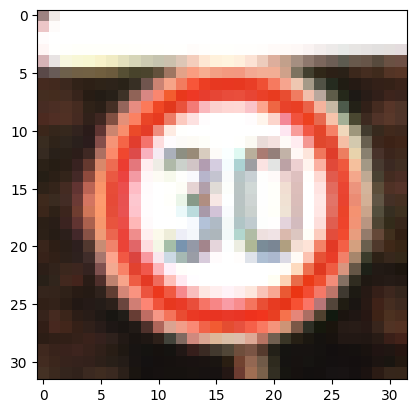

In [10]:
plt.imshow(X_train[3000])
print(X_train[3000].shape)
print(y_train[3000])

(32, 32)


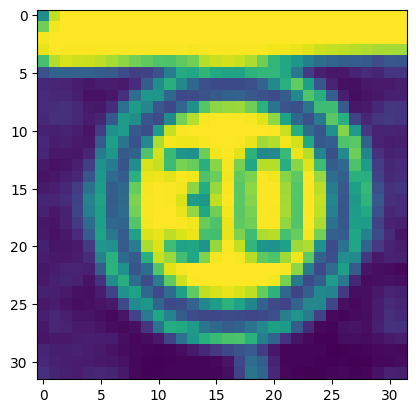

In [11]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

img = grayscale(X_train[3000])
plt.imshow(img)
print(img.shape)

(32, 32)


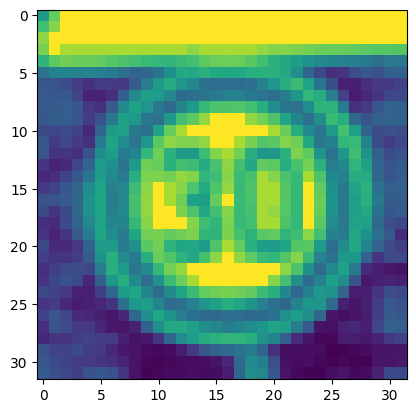

In [12]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

img = equalize(img)
plt.imshow(img)
print(img.shape)

In [13]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img / 255
  return img

In [14]:
X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


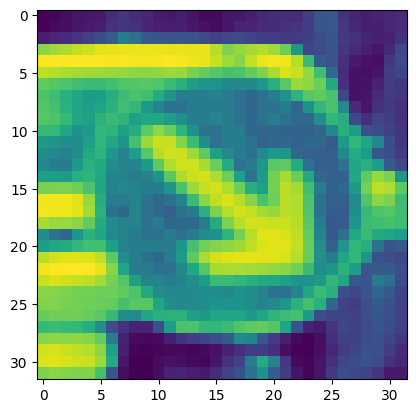

In [15]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
print(X_train.shape)

In [16]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

In [17]:
datagen = ImageDataGenerator(width_shift_range = 0.1,
                             height_shift_range = 0.1,
                            zoom_range = 0.2,
                            shear_range = 0.1,
                            rotation_range = 10.)

datagen.fit(X_train)

(15, 32, 32, 1)


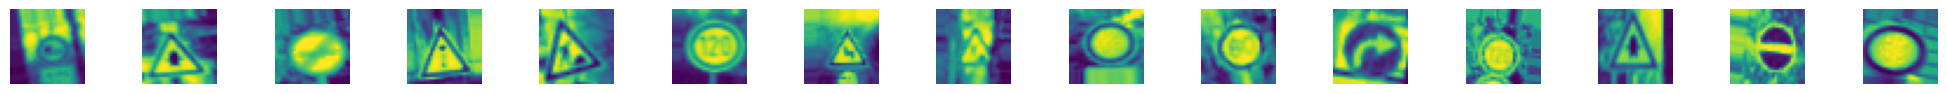

In [18]:
batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")

print(X_batch.shape)

In [19]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [20]:
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

In [21]:
def better_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape = (32, 32, 1), activation = 'relu'))
  model.add(Conv2D(60, (5, 5), input_shape= (32, 32, 1), activation = 'relu'))

  model.add(MaxPooling2D(pool_size = (2, 2)))

  model.add(Conv2D(30, (3, 3) , activation = 'relu'))
  model.add(Conv2D(30, (3, 3) , activation = 'relu'))

  model.add(MaxPooling2D(pool_size = (2,2)))

  #model.add(Dropout(0.5))

  model.add(Flatten())

  model.add(Dense(500, activation = 'relu'))

  model.add(Dropout(0.5))

  model.add(Dense(num_classes, activation = 'softmax'))

  model.compile(Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model


In [22]:
model = better_model()
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 60)          │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 60)          │          90,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 30)          │          16,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 30)            │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         240,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          21,543 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 378,023 (1.44 MB)

 Trainable params: 378,023 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None


In [23]:
history = model.fit(datagen.flow(X_train, y_train, batch_size = 50),
                            steps_per_epoch = 2000,
                            epochs = 15,
                            validation_data=(X_val, y_val), shuffle = 1)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 695/2000 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.2962 - loss: 2.6035

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.4363 - loss: 2.0443 - val_accuracy: 0.9109 - val_loss: 0.2765
Epoch 2/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.8228 - loss: 0.5856 - val_accuracy: 0.9676 - val_loss: 0.1205
Epoch 3/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8926 - loss: 0.3525 - val_accuracy: 0.9703 - val_loss: 0.0925
Epoch 4/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9171 - loss: 0.2678 - val_accuracy: 0.9703 - val_loss: 0.0845
Epoch 5/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9309 - loss: 0.2211 - val_accuracy: 0.9723 - val_loss: 0.0901
Epoch 6/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9430 - loss: 0.1828 - val_accuracy: 0.9819 - val_loss: 0.0685
Epoch 7/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9516 - loss: 0.1589 - val_accuracy: 0.9902 - val_loss: 0.0358
Epoch 8/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9526 - loss: 0.1516 - val

Text(0.5, 0, 'epoch')

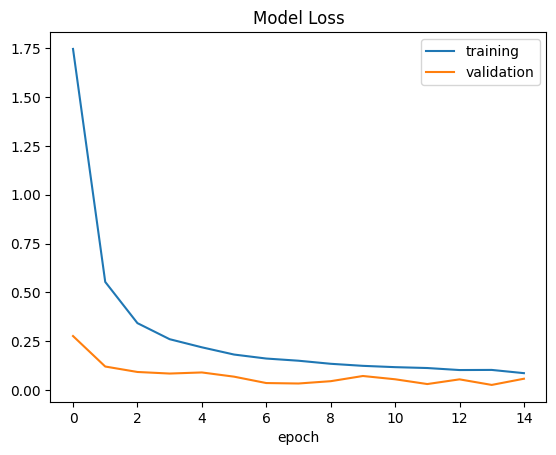

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Model Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

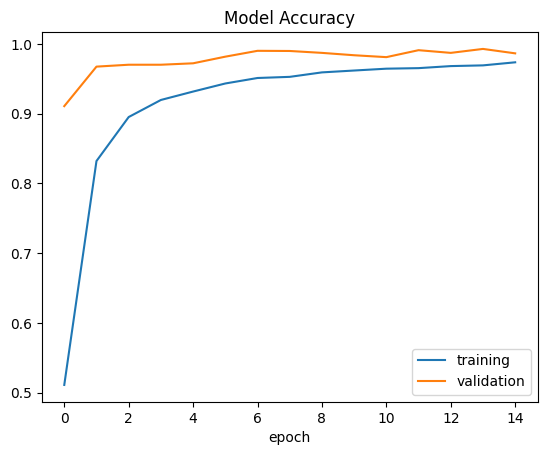

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Model Accuracy')
plt.xlabel('epoch')

In [26]:
score = model.evaluate(X_test, y_test , verbose = 0)
print("The test score is: ", score[0])
print("The Accuracy score is: ", score[1])

The test score is:  0.12346868962049484
The Accuracy score is:  0.9695170521736145


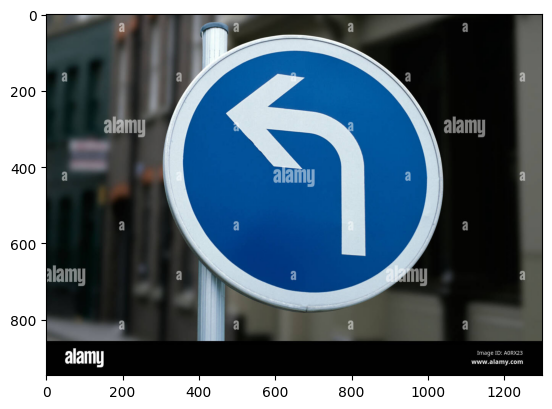

In [27]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream = True)
img = Image.open(r.raw)
plt.imshow(img, cmap = plt.get_cmap('gray'))

(32, 32)


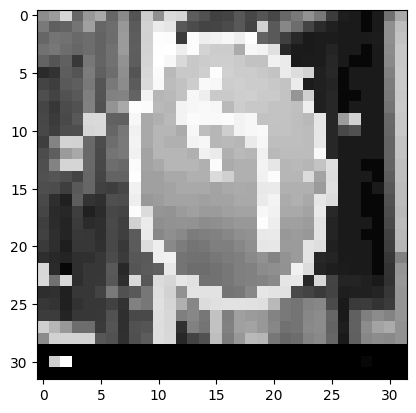

In [28]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [29]:
img = img.reshape(1, 32, 32, 1)

In [30]:
predictions = model.predict(img)
predicted_class = np.argmax(predictions, axis = -1)

print("The Predicted sign: " + str(predicted_class) + ", with accuracy: " + str(predictions[0][predicted_class]))
print("Traffic sign: " + str(data['SignName'][predicted_class]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
The Predicted sign: [12], with accuracy: [0.7215047]
Traffic sign: 12    Priority road
Name: SignName, dtype: object


In [31]:
!wget 'https://myanhsafety.com.vn/image/cache/catalog/bienbao102-0x0.jpg'

--2025-04-02 12:46:46--  https://myanhsafety.com.vn/image/cache/catalog/bienbao102-0x0.jpg
Resolving myanhsafety.com.vn (myanhsafety.com.vn)... 103.57.221.50
Connecting to myanhsafety.com.vn (myanhsafety.com.vn)|103.57.221.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14153 (14K) [image/jpeg]
Saving to: ‘bienbao102-0x0.jpg’

bienbao102-0x0.jpg  100%[===================>]  13.82K  82.5KB/s    in 0.2s    

2025-04-02 12:46:48 (82.5 KB/s) - ‘bienbao102-0x0.jpg’ saved [14153/14153]



(500, 500, 3)


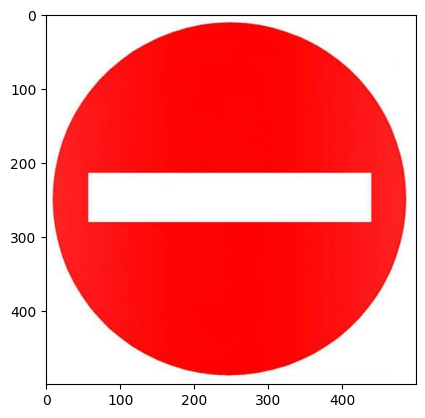

In [32]:
test_image = plt.imread('bienbao102-0x0.jpg')
print(test_image.shape)
plt.imshow(test_image)

(32, 32)


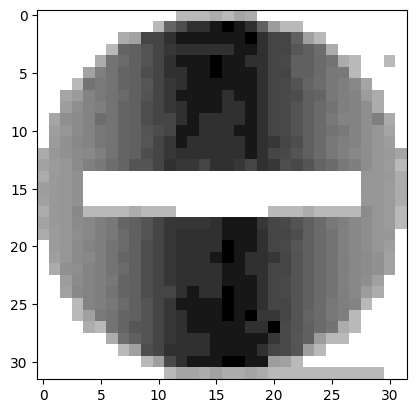

In [33]:
img = np.asarray(test_image)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [34]:
img = img.reshape(1, 32, 32, 1)

In [35]:
predictions = model.predict(img)
predicted_class = np.argmax(predictions, axis = -1)

print("The Predicted sign: " + str(predicted_class) + ", with accuracy: " + str(predictions[0][predicted_class]))
print("Traffic sign: " + str(data['SignName'][predicted_class]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The Predicted sign: [17], with accuracy: [0.9998505]
Traffic sign: 17    No entry
Name: SignName, dtype: object


In [45]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.1/977.1 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [65]:
import cv2
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Kiểm tra video có mở được không
cap = cv2.VideoCapture("/content/traffic-sign-vid.mp4")
if not cap.isOpened():
    print("❌ Không thể mở video. Kiểm tra đường dẫn hoặc định dạng video.")

while cap.isOpened():
    ret, frame = cap.read()

    # Kiểm tra frame có hợp lệ không
    if not ret or frame is None:
        print("❌ Lỗi: Không đọc được frame. Video có thể đã kết thúc hoặc bị lỗi.")
        break

    # Resize frame về 32x32
    resized_frame = cv2.resize(frame, (32, 32))

    # Tiền xử lý ảnh
    img = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img) / 255.0
    img = img.reshape(1, 32, 32, 1)

    # Dự đoán biển báo
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=-1)
    accuracy = predictions[0][predicted_class]

    # Ép kiểu để tránh lỗi numpy.ndarray
    predicted_class = int(predicted_class[0])
    accuracy = float(accuracy[0])

    # Hiển thị kết quả
    label = f"Sign: {predicted_class}, Accuracy: {accuracy:.2f}"
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Hiển thị frame trong Colab
    cv2_imshow(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:3845: error: (-215:Assertion failed) !dsize.empty() in function 'resize'


In [57]:
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        # Resize the frame to 32x32
        resized_frame = cv2.resize(frame, (32, 32))

        # Preprocess the frame
        img = preprocessing(resized_frame)
        img = img.reshape(1, 32, 32, 1)

        # Predict the traffic sign
        # predictions = model.predict(img) # model is a

cap.release()
out.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 